In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Load data
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

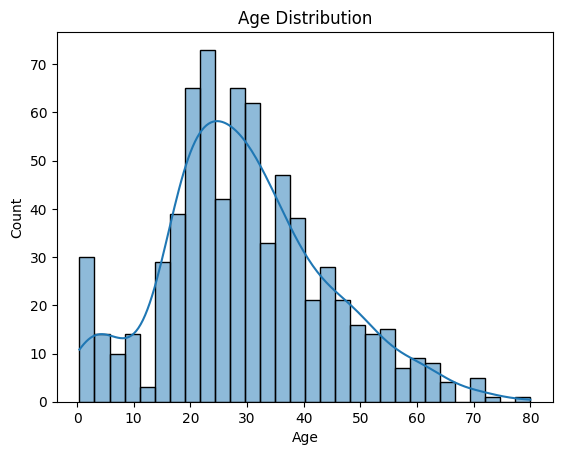

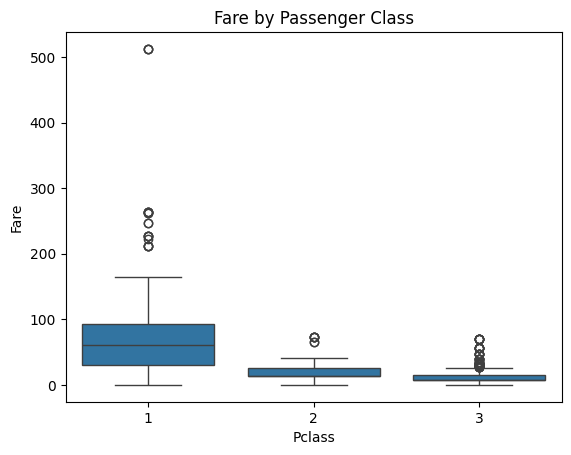

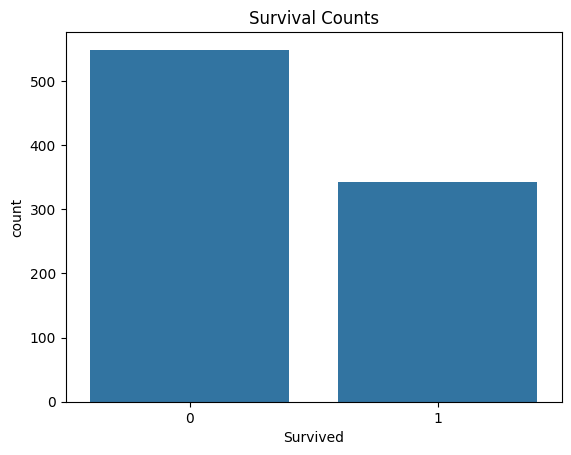

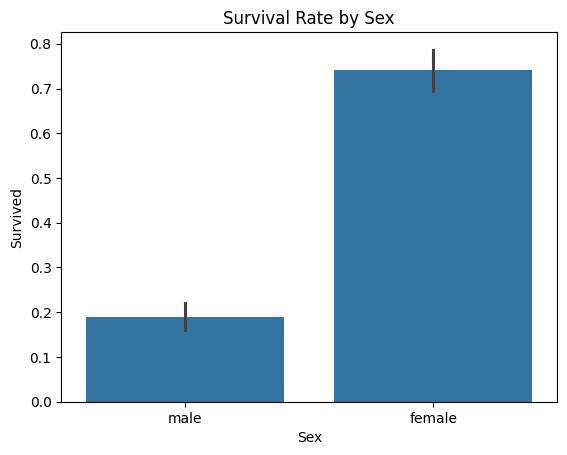

In [2]:
# EDA
#Plot Age Distribution
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Fare by Class
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Fare by Passenger Class')
plt.show()

# Survival Counts
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Counts')
plt.show()

# Survival by Sex
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()

In [3]:
# Data Preprocessing

# Combine datasets
full_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

# Fill missing values
full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
full_df['Fare'].fillna(full_df['Fare'].median(), inplace=True)
full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace=True)

# Drop columns
full_df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

# Encode categorical features
full_df = pd.get_dummies(full_df, columns=['Sex', 'Embarked'], drop_first=True)

# Split back into train/test
train_processed = full_df[:len(train_df)]
test_processed = full_df[len(train_df):]

# Features & Target
X_train = train_processed.drop(columns=['Survived', 'PassengerId'])
y_train = train_processed['Survived']
X_test = test_processed.drop(columns=['Survived', 'PassengerId'])

<ipython-input-3-904754f313f8>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
<ipython-input-3-904754f313f8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [4]:

# Model Training & Evaluation

# Define models
lgbm_model = LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Evaluation function
def evaluate_model(model, X, y):
    return {
        "accuracy": cross_val_score(model, X, y, cv=5, scoring='accuracy').mean(),
        "precision": cross_val_score(model, X, y, cv=5, scoring='precision').mean(),
        "recall": cross_val_score(model, X, y, cv=5, scoring='recall').mean(),
        "f1": cross_val_score(model, X, y, cv=5, scoring='f1').mean()
    }

# Run evaluation
lgbm_scores = evaluate_model(lgbm_model, X_train, y_train)
xgb_scores = evaluate_model(xgb_model, X_train, y_train)

# Show results
performance_df = pd.DataFrame([lgbm_scores, xgb_scores], index=["LightGBM", "XGBoost"])
print(performance_df)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:49:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:49:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

          accuracy  precision    recall        f1
LightGBM  0.828328   0.792518  0.748380  0.769299
XGBoost   0.823821   0.781777  0.751321  0.765840


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:49:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [5]:
# Final Predictions for Submission


# Train on full training set
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict on test set
lgbm_preds = lgbm_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Create submission files
submission_lgbm = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': lgbm_preds
})
submission_lgbm.to_csv('lgbm_submission.csv', index=False)

submission_xgb = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': xgb_preds
})
submission_xgb.to_csv('xgb_submission.csv', index=False)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:50:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
### Comparative Summary

## Both LightGBM and XGBoost performed well on the Titanic dataset. Based on cross-validation scores:
- **[Model X]** had higher precision and recall.
- **[Model Y]** was slightly faster and simpler to tune.
# This suggests that [Model X] may be more reliable for safety-critical predictions, while [Model Y] could
 # be preferable in resource-constrained scenarios.